# Import Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [2]:
from DataPreprocessing import *

# Algorithm

In [3]:
class CustomGradientBoostingRegressor:
    
    def __init__(self, learning_rate, n_estimators, max_depth, random_state):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []
        
    def fit(self, X, y):
        
        self.F0 = y.mean()
        Fm = self.F0
        
        for _ in range(self.n_estimators):
            r = y - Fm
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=0)
            tree.fit(X, r)
            gamma = tree.predict(X)
            Fm += self.learning_rate * gamma
            self.trees.append(tree)
            
    def predict(self, X):
        
        Fm = self.F0
        
        for i in range(self.n_estimators):
            Fm += self.learning_rate * self.trees[i].predict(X)
            
        return Fm

# Output

In [4]:
sklearn_gbm = GradientBoostingRegressor(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=3,
    random_state=0
)
sklearn_gbm.fit(X_train_std, y_train)
sklearn_gbm_rmse = metrics.mean_squared_error(y_test, sklearn_gbm.predict(X_test_std), squared=False)
print(f"RMSE using Scikit-learn Library:{sklearn_gbm_rmse:.15f}")

custom_gbm = CustomGradientBoostingRegressor(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=3,
    random_state=0
)
custom_gbm.fit(X_train_std, y_train)
              
custom_gbm_rmse = metrics.mean_squared_error(y_test, custom_gbm.predict(X_test_std), squared=False)
print(f"RMSE using Algorithm:{custom_gbm_rmse:.15f}")

print("Model Accuracy on the train set: %.15f" % sklearn_gbm.score(X_train_std, y_train))
print("Model Accuracy using Scikit-learn Library on the test set: %.15f" % sklearn_gbm.score(X_test_std, y_test))

mean = y_test.values.mean()
predict = custom_gbm.predict(X_test_std)
n = y_test.shape[0]
u = 0
v = 0

for i in range(n):
    u += (y_test.values[i]-predict[i])**2
    v += (y_test.values[i]-mean)**2
custom_accuracy = (1-u/v)
print('Model Accuracy using Algorithm on the test set: %.15f' %custom_accuracy)

RMSE using Scikit-learn Library:185448.695914584881393
RMSE using Algorithm:185786.483946653897874
Model Accuracy on the train set: 0.948762366499092
Model Accuracy using Scikit-learn Library on the test set: 0.874880051683447
Model Accuracy using Algorithm on the test set: 0.874423833729561


# Hyperparameters tuning

In [5]:
from sklearn.model_selection import GridSearchCV

#Using GridSearchCV
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, scoring = 'accuracy', cv = 2, n_jobs=-1)
grid_GBR.fit(X_train_std, y_train)

# Results from Grid Search
print(" Results from Grid Search " )
print()
print("\n The best estimator across ALL searched params:\n",
          grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",
          grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",
          grid_GBR.best_params_)

E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


 Results from Grid Search 


 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=4)

 The best score across ALL searched params:
 nan

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}


# Output after tune hyperparameters

In [6]:
sklearn = GradientBoostingRegressor(
    n_estimators=500, 
    learning_rate=0.04, 
    max_depth=4,
    random_state=0
)
sklearn.fit(X_train_std, y_train)
sklearn_rmse = metrics.mean_squared_error(y_test, sklearn.predict(X_test_std), squared=False)
print(f"RMSE after tune hyperparameters using Scikit-learn library: {sklearn_rmse:.15f}")
print("Model Accuracy after tune hyperparameters on train set: %.15f" % sklearn.score(X_train_std, y_train))
print("Model Accuracy after tune hyperparameters on test set: %.15f" % sklearn.score(X_test_std, y_test))

RMSE after tune hyperparameters using Scikit-learn library: 172838.092051162762800
Model Accuracy after tune hyperparameters on train set: 0.974221366280669
Model Accuracy after tune hyperparameters on test set: 0.891317926394951


# Importance Features

In [7]:
# get importance
importances = sklearn_gbm.feature_importances_

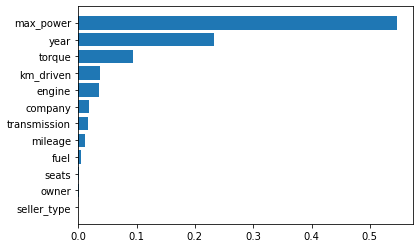

In [8]:
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

# Predicting some Instances

In [9]:
X_test_predict = X_test_std[0:3]
X_test_predict

array([[ 1.38954455, -1.08145768,  1.11558082,  0.30072914, -3.3142684 ,
        -0.74641118,  0.626382  , -0.47460479, -0.18362431, -1.34744894,
        -0.44536017,  0.33188388],
       [ 1.38954455, -0.67091488,  1.11558082,  0.30072914,  0.30172571,
        -0.74641118,  0.4298544 , -0.47460479, -0.18362431, -1.34744894,
        -0.44536017,  0.33188388],
       [ 0.87204969, -0.30142637,  1.11558082,  0.30072914,  0.30172571,
        -0.74641118,  1.29805861, -1.28731519, -1.27964718,  1.4188324 ,
        -0.44536017,  0.33188388]])

In [10]:
y_test

1363     700000
3171     550000
2201     275000
6483     235000
6104     375000
         ...   
2384    3600000
3214    1000000
3542     700000
6395     150000
5739     254999
Name: selling_price, Length: 1343, dtype: int64

In [11]:
y_predict = sklearn.predict(X_test_predict)
y_predict

array([652699.21110964, 592002.10578764, 302823.03889886])

In [12]:
pd.DataFrame({"y_test": y_test.values[0:3], "y_predict": y_predict})

,y_test,y_predict
0,700000,652699.211110
1,550000,592002.105788
2,275000,302823.038899
